## LECTURE 14: Heirarchical Clustering

## course: Awfera Machine Learning

## Instructor: Dr. Shazia Saqib

## Student: Muhammad Shafiq

____________

# Introduction to Hierarchical Clustering

- Unsupervised learning method
- Builds clusters in hierarchical tree-like structure
- Form clusters by merging or spliting data points

## Types of Hierarchical

 - **Agglomeratice Clustering(Bottom-up)**

   - Start with each data point as a separate cluster 
   - Iteratively merges the closest cluster until  a single cluster remains or a desired number of clusters is reached

 - **Divisive Clustering(top-down)**
   - Starts with all data points in a single cluster 
   - Recursively splits clusters into smaller ones based on dissimilarity
   - less common and computationally expensive compared to agglomerative clustering   

Agglomerative clustering is more commonly used, although it has a **quadratic computational cost** (order n2), which can make it expensive for large datasets.   

## 2. Linkage Criteria: How to Merge Clusters?
Different criteria define how the distance between clusters is measured:

  1. **Single Linkage:**

 Uses the shortest distance between two points in different clusters. Simple but sensitive to noise and outliers
 
  - **Definition**:
  Shortest distance between any pair of points
  - **Characteristic**
  Sensitive to outliers
  - **Measurement**
  Considers closest points in two clusters
  2. **Complete Linkage:**

 Uses the longest distance between two points in clusters. Produces compact, tight clusters and is less affected by outliers.
 
  3. **Average Linkage:**

 Uses the average distance between all pairs of points from two clusters.
 
  4. **Ward’s Method:**

 Focuses on minimizing the variance within clusters. This is the most effective and widely preferred method.

## 3. Applications of Hierarchical Clustering
- **Customer Segmentation**: Grouping customers based on behavior or demographics.
- **Document Organization**: Clustering similar documents to enhance retrieval and analysis.
- **Genetic Analysis**: Widely used in biology for gene grouping and evolutionary studies.
- **Image Segmentation**: Partitioning images into meaningful segments.

## Advantages of Hierarachical Clustering
  - **Flexible**: Creates natural, hierarchical, tree-like groupings. Eliminates the need to specify the number of clusters in advance allowing the algorithm to discover natural groupings in the data.

  - **Interpretability**: Dendrograms visually illustrate cluster formation. Creates an intuitive tree-like structure that reveals relationships between clusters at different levels of granualrity

  - **Applications**: Useful in customer segmentation, document clustering, genetic analysis, and image segmentation.

  

## Limitations of Hierarchical Clustering

 - **Sensitivity**:

 Highly susceptable to outliers and noise in datasets, potentially leading to distorted cluster formations.

 - **Computational Cost:**

 Requires significant processing power and time with O(n2) complexity, making it impractical for large datasets

 - **Irreversibility:**

 Once clusters are merged or split decisions cannot be undone,  making the algorithm unable to correct earlier suboptimal choices.



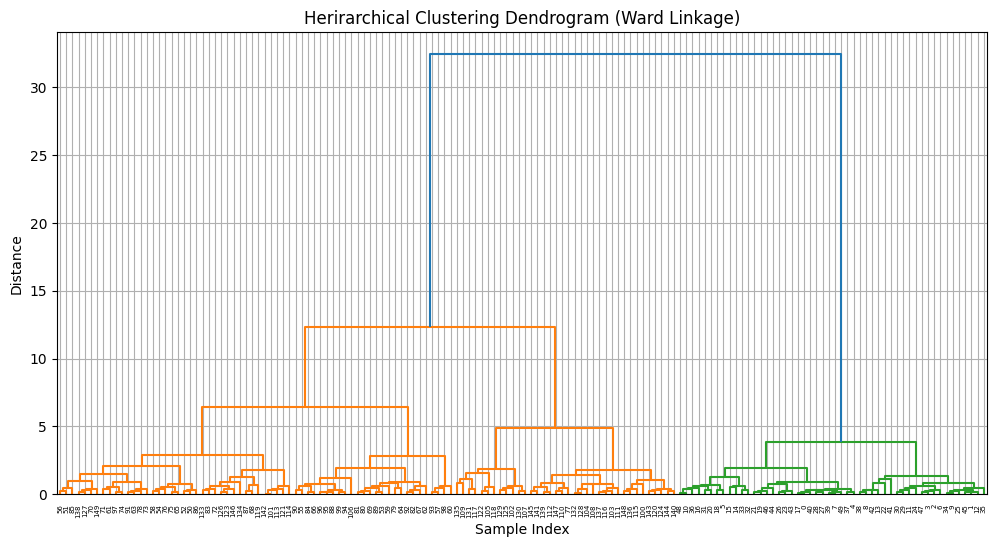

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load the dataset of Iris
iris = load_iris()
X = iris.data
y_true = iris.target

# Creatte a dataframe
df = pd.DataFrame(X, columns=iris.feature_names)
df['Actual_Lable'] = y_true

# plot the dendogram
plt.figure(figsize=(12, 6))
linked = linkage(X, method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title("Herirarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

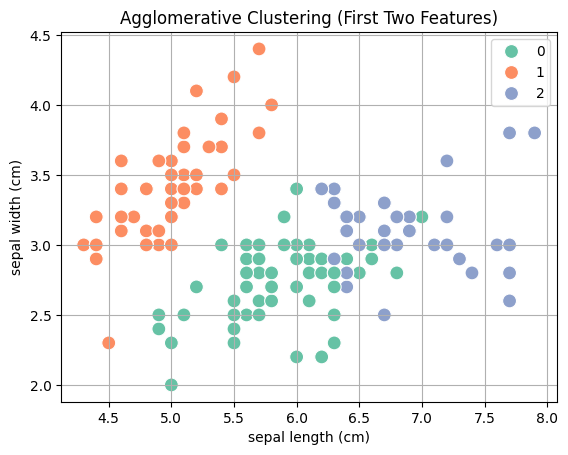

In [4]:
# step 2: Apply agglomerative clustering
k=3
hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')

df['Cluster_Label']=hc.fit_predict(X)

# step 3: Visualize Clusters with first two feature
plt.Figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df["Cluster_Label"], palette='Set2', s=100)
plt.title("Agglomerative Clustering (First Two Features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.legend()
plt.show()